## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Processing

#### Meaning of the data:-
- age
- sex
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
df = pd.read_csv("/content/drive/MyDrive/datasets/heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

723

In [9]:
# removing the duplicate values
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


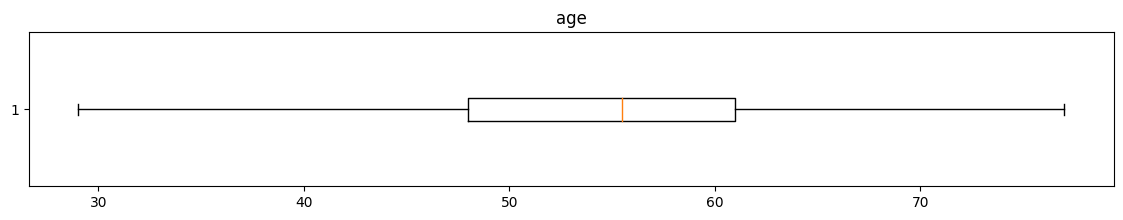

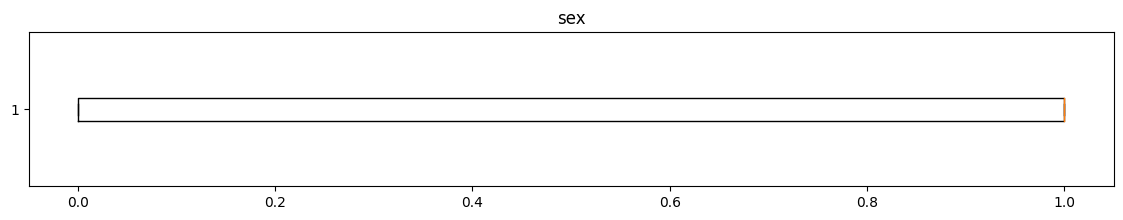

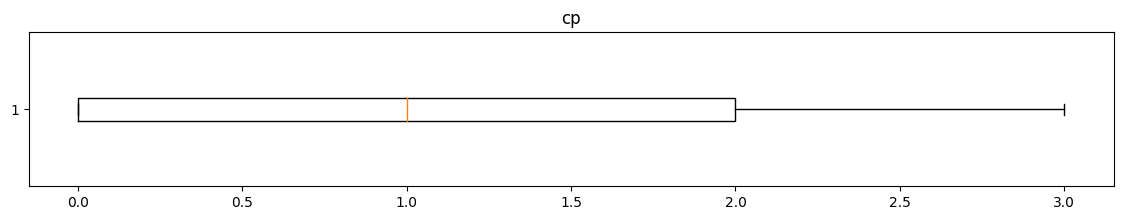

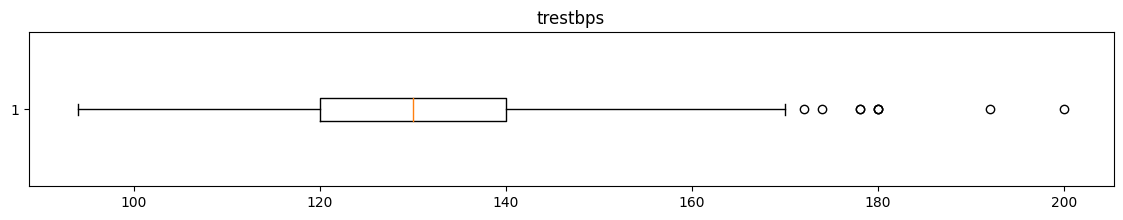

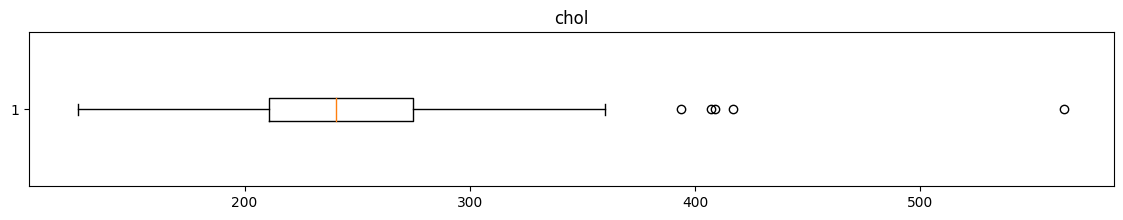

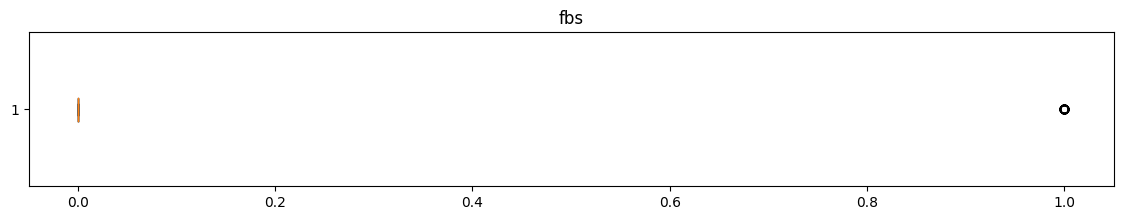

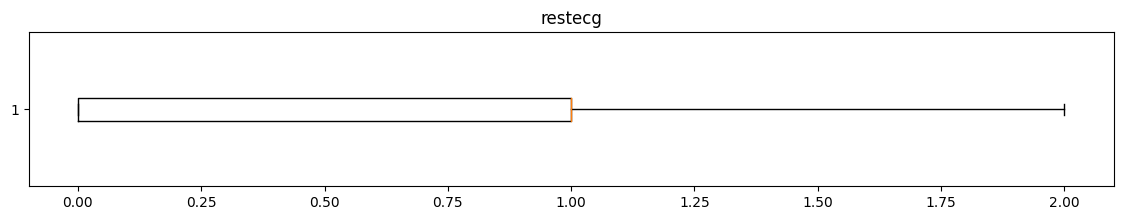

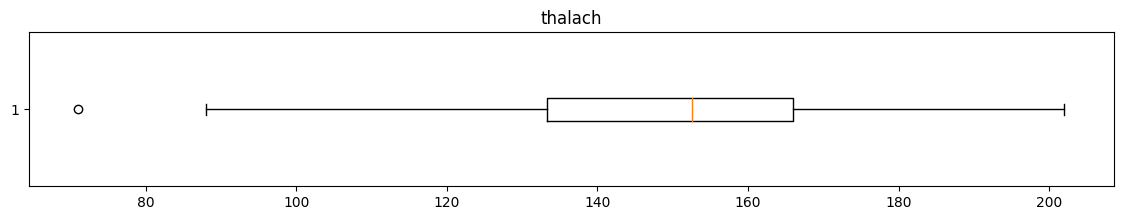

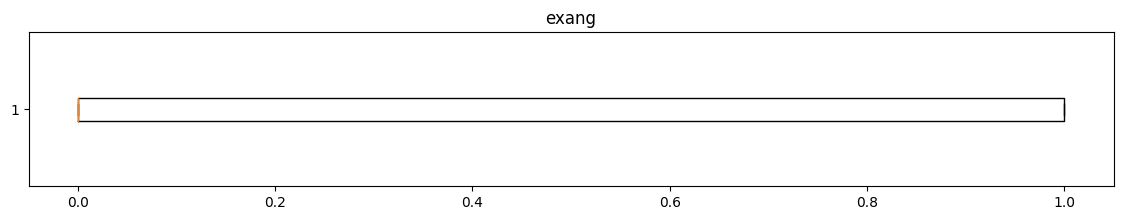

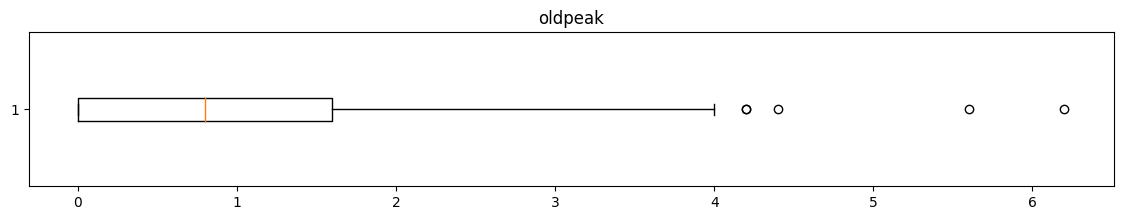

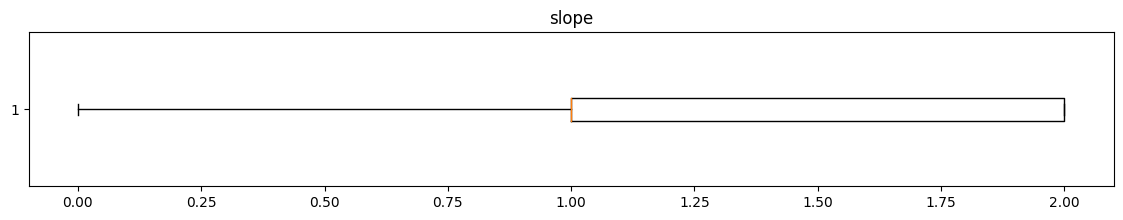

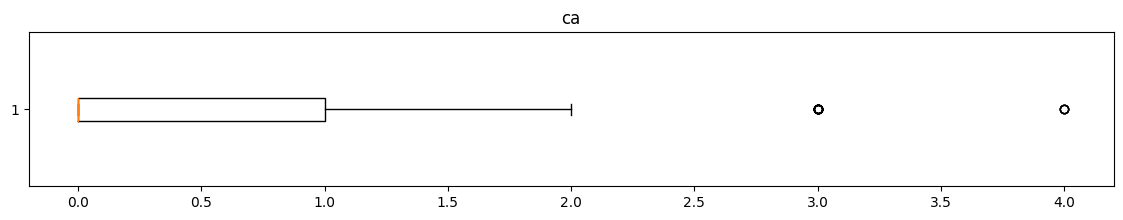

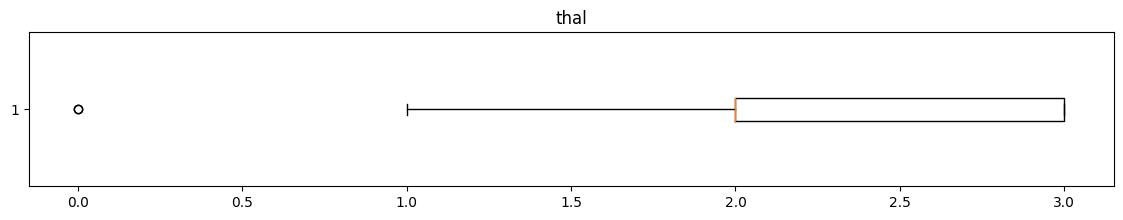

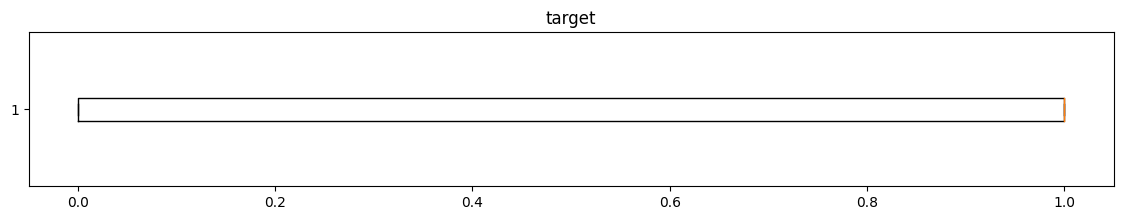

In [12]:
for col in df:
  plt.figure(figsize=(14,2))
  plt.boxplot(df[col], vert=0)
  plt.title(col)
  plt.show()

In [13]:
# removing the outliers
for col in df:
  q1 = df[col].quantile(.25)
  q3 = df[col].quantile(.75)
  iqr = q3-q1
  upperExtreme = q3 + 1.5 * iqr
  lowerExtreme = q1 - 1.5 * iqr
  df = df[(df[col] <= upperExtreme ) & (df[col] >= lowerExtreme)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


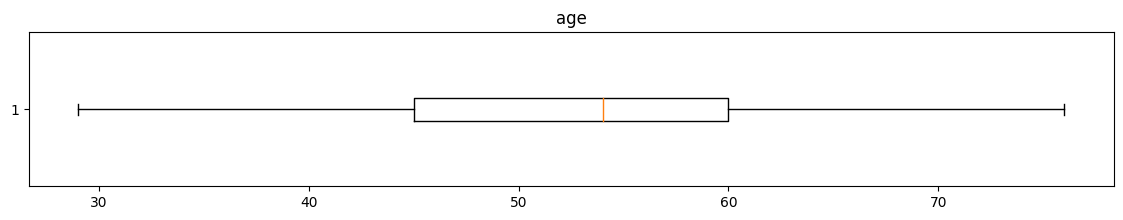

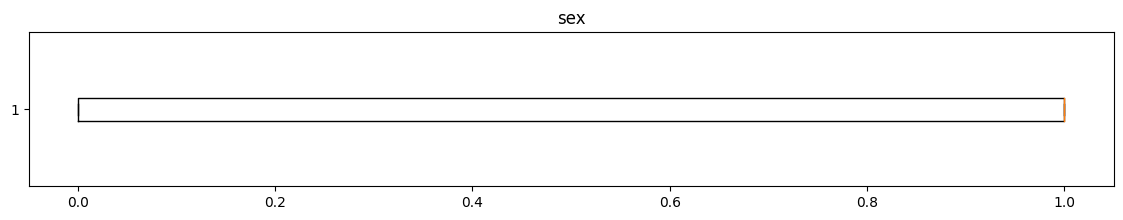

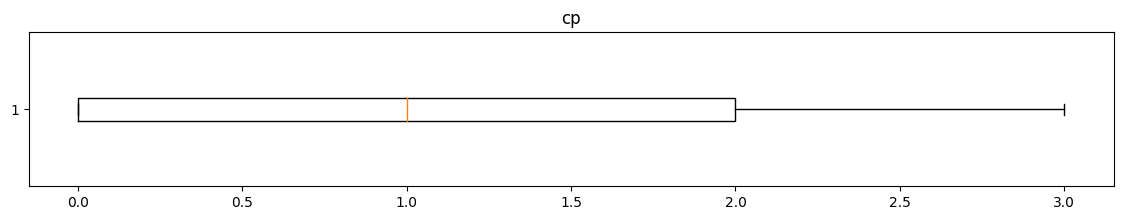

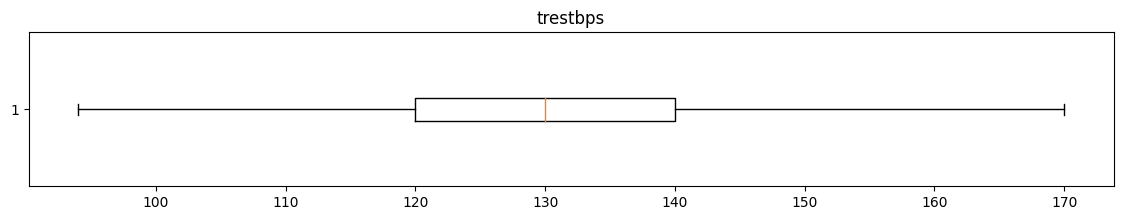

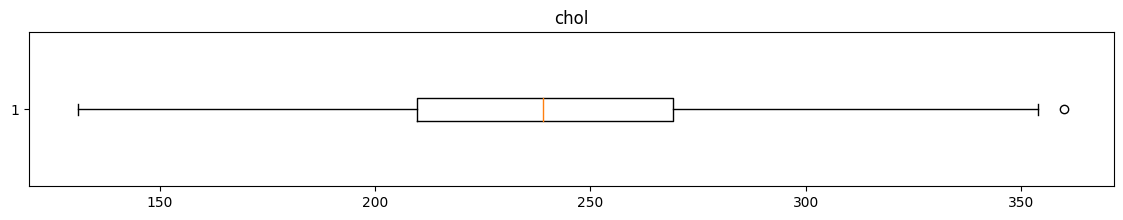

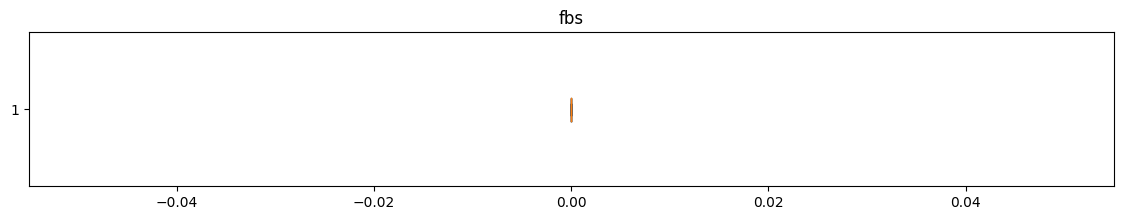

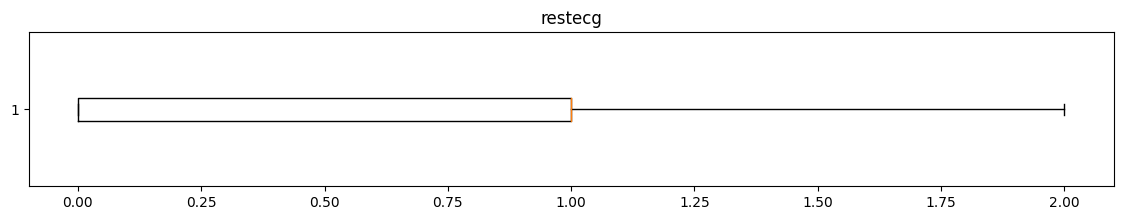

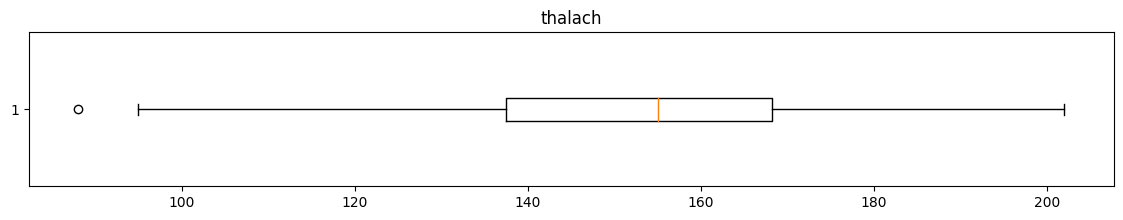

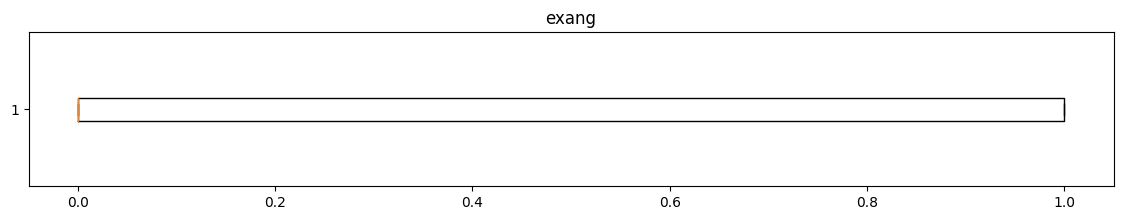

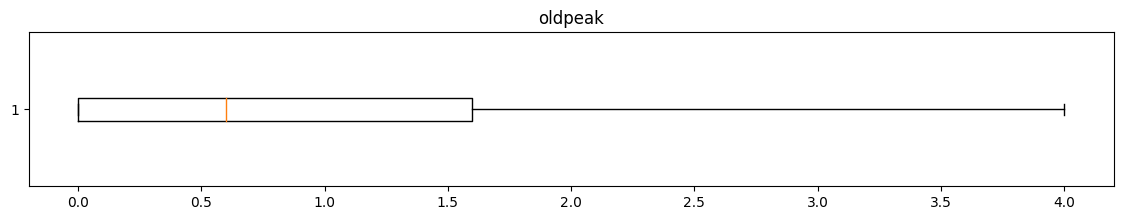

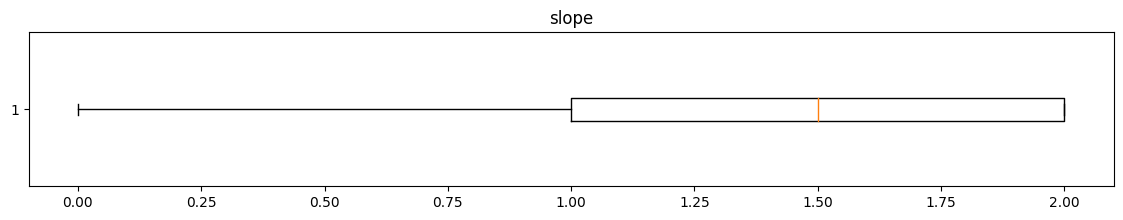

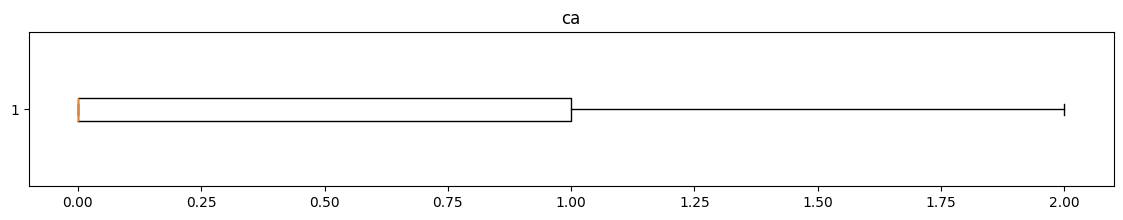

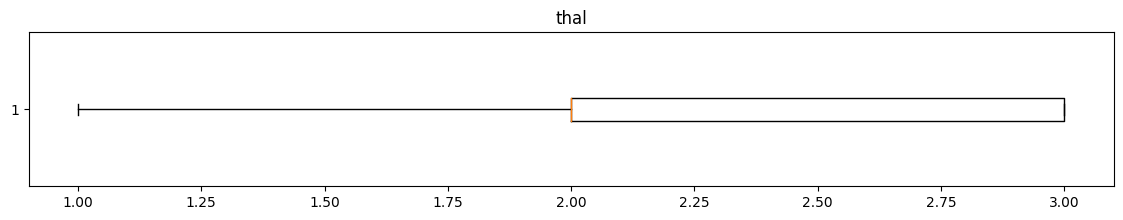

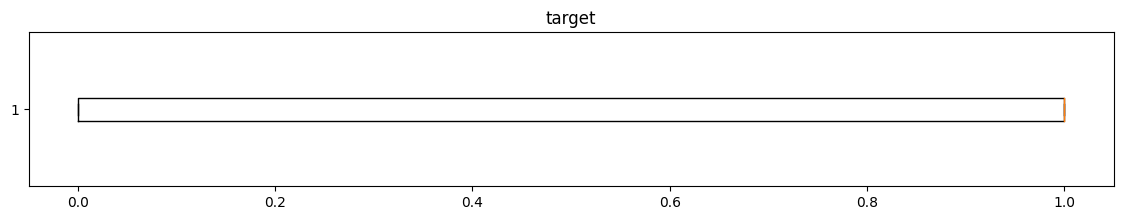

In [14]:
for col in df:
  plt.figure(figsize=(14,2))
  plt.boxplot(df[col], vert=0)
  plt.title(col)
  plt.show()

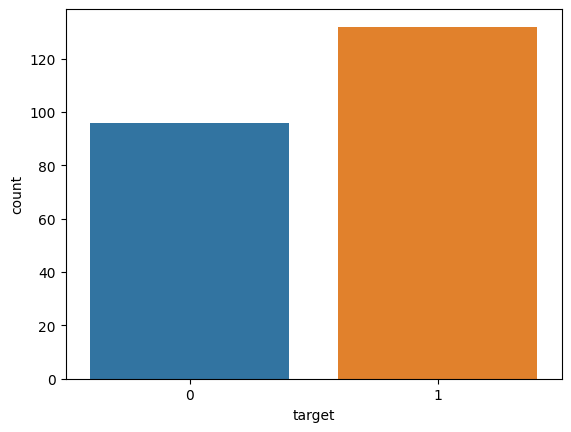

In [15]:
# distribution of target column
plt.figure()
sns.countplot(data = df, x="target")
plt.show()

- 0 --> No heart disease
- 1 --> heart disease

<Axes: >

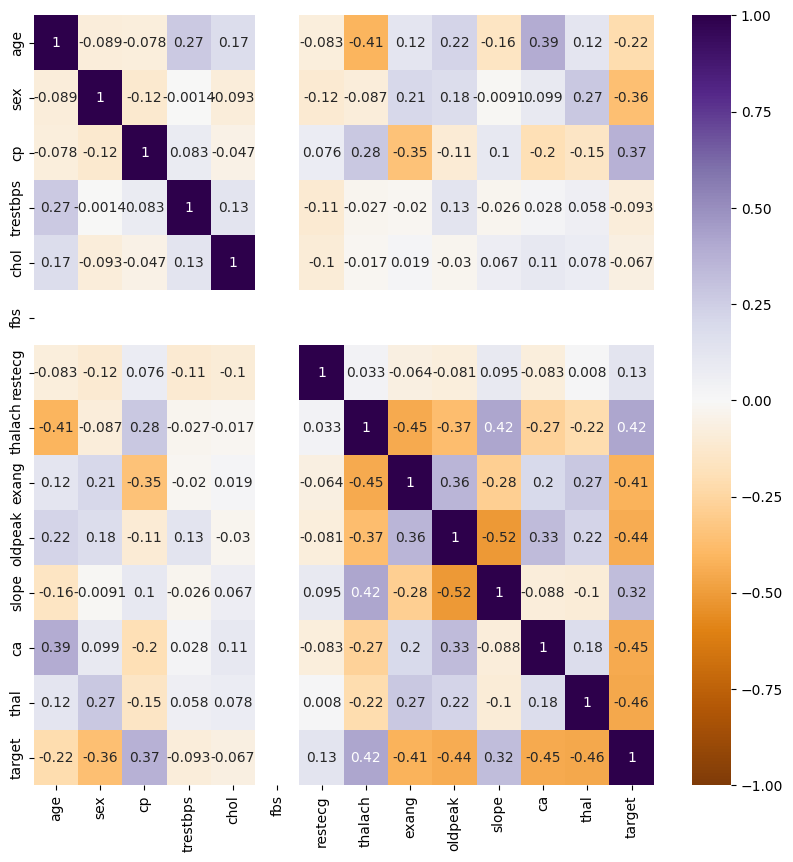

In [16]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, vmin=-1, cmap="PuOr", annot=True)

<Figure size 640x480 with 0 Axes>

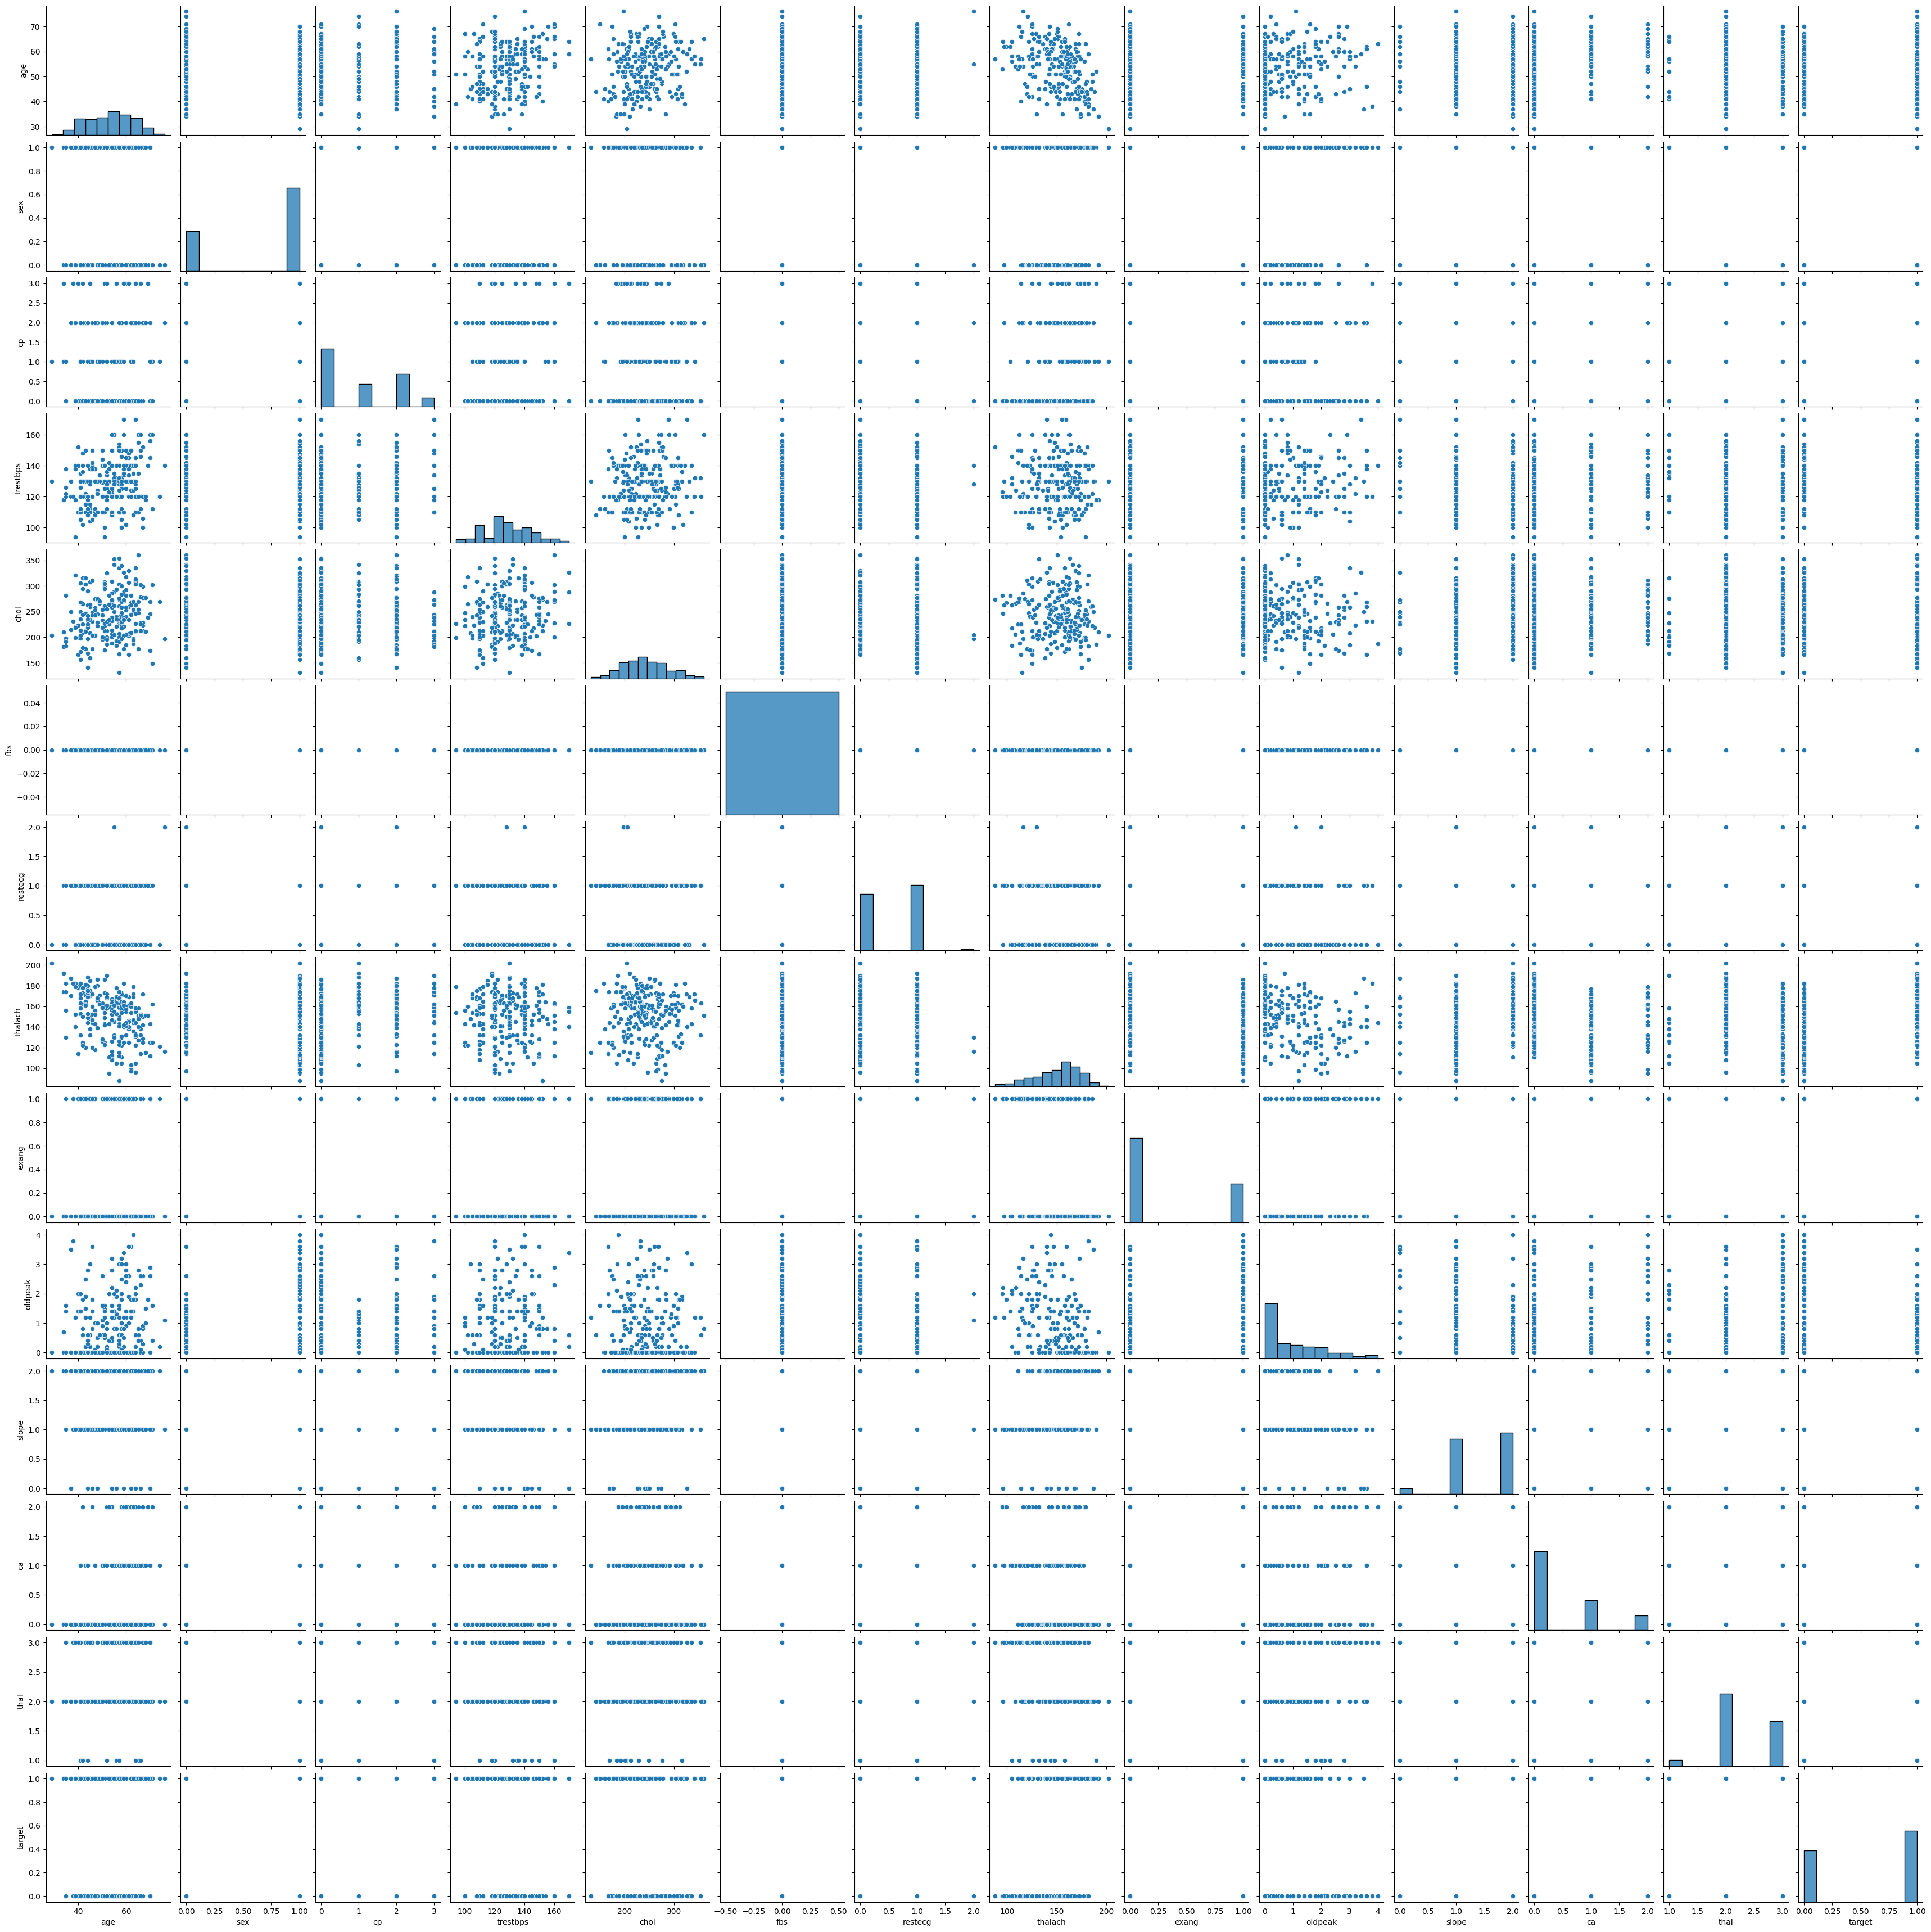

In [17]:
plt.figure()
sns.pairplot(df)
plt.show()

## Splitting the Features and the target

In [18]:
x = df.drop(columns=["target"], axis=1)
y = df["target"]

## Splitting into training and testing data

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y)
x_train.shape, y_test.shape

((193, 13), (35,))

## Scaling the data using Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train, x_test

(array([[ 0.2911998 ,  0.72089184, -0.94716242, ..., -0.78044368,
          0.75736747, -2.49451559],
        [ 0.07871753,  0.72089184,  1.02907917, ..., -2.49209857,
          0.75736747, -0.59907658],
        [-1.19617611, -1.38717065,  1.02907917, ..., -0.78044368,
         -0.68987928, -0.59907658],
        ...,
        [-0.13376475, -1.38717065,  1.02907917, ..., -0.78044368,
         -0.68987928, -0.59907658],
        [ 0.71616434,  0.72089184, -0.94716242, ..., -0.78044368,
          2.20461423,  1.29636243],
        [-0.98369384,  0.72089184, -0.94716242, ...,  0.93121121,
          0.75736747, -0.59907658]]),
 array([[ 0.2911998 ,  0.72089184,  0.04095837, -0.52829625, -0.0968331 ,
          0.        ,  0.89811593,  0.77535614, -0.65546139, -0.89186244,
         -2.49209857, -0.68987928, -0.59907658],
        [-0.13376475,  0.72089184, -0.94716242, -0.21262697, -0.72352303,
          0.        ,  0.89811593,  0.73085905, -0.65546139,  0.06388132,
          0.93121121,  2.204

## Model training

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

## Evaluating the model

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.95      0.97        20

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



In [26]:
x_test[0]

array([ 0.2911998 ,  0.72089184,  0.04095837, -0.52829625, -0.0968331 ,
        0.        ,  0.89811593,  0.77535614, -0.65546139, -0.89186244,
       -2.49209857, -0.68987928, -0.59907658])

In [29]:
input = {
"age":[52],
"sex":[1],
"cp":[0],
"trestbps":[125],
"chol":[212],
"fbs":[0],
"restecg"	:[1],
"thalach"	:[168],
"exang"	:[0],
"oldpeak"	:[1],
"slope"	:[2],
"ca":[2],
"thal":[3]
}
input_pd = pd.DataFrame(input)
input_pd = sc.transform(input_pd)
model.predict(input_pd)

array([0])

In [31]:
import pickle

pickle.dump(sc, open("scaler.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))